# Let Visualize Some Depth Maps

In [1]:
import numpy as np
import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import math

In [22]:
img_path1 = "./selfies/1.jpg"
img_path2 = "./selfies/2.jpg"
img_path3 = "./selfies/3.jpg"
img_path4 = "./selfies/4.jpg"
img_path5 = "./comp/1.jpg"
img_path6 = "./comp/2.jpg"

In [3]:
# Read image and split it in a stereo pair

img = cv2.imread(img_path3, 0)
img_H, img_W = img.shape
new_H = img_H
new_W = math.floor(img_W / 2)

print('Read and split image...')
imgLeft = img [0:img_H,0:new_W] #Y+H and X+W
imgRight = img [0:img_H, new_W:img_W] 

Read and split image...


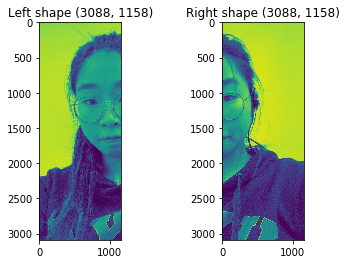

In [4]:
print()

fid, axs = plt.subplots(1,2)
axs[0].imshow(imgLeft)
axs[0].set_title(f"Left shape {imgLeft.shape}")
axs[1].imshow(imgRight)
axs[1].set_title(f"Right shape {imgRight.shape}")
plt.show()

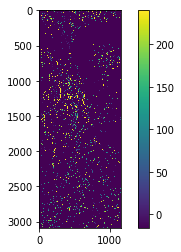

In [5]:
sbm = cv2.StereoBM_create(numDisparities=16, blockSize=15)

disp = sbm.compute(imgLeft, imgRight)

plt.imshow(disp)
plt.colorbar()
plt.show()

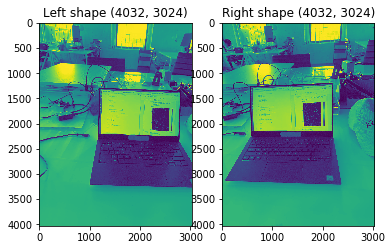

In [24]:
img1 = cv2.imread(img_path6, 0)
img2 = cv2.imread(img_path5, 0)

fig, axs = plt.subplots(1,2)
axs[0].imshow(img2)
axs[0].set_title(f"Left shape {img2.shape}")
axs[1].imshow(img1)
axs[1].set_title(f"Right shape {img1.shape}")
plt.show()

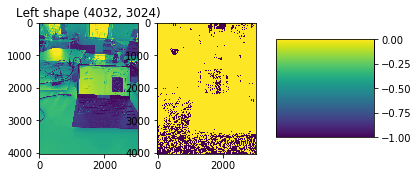

<Figure size 1440x720 with 0 Axes>

In [44]:
sbm = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disp = sbm.compute(img2, img2).astype(np.float32) /16 


fig, axs = plt.subplots(1,3)
axs[0].imshow(img2)
axs[0].set_title(f"Left shape {img2.shape}")
axs[1].imshow(disp)
plt.colorbar(plt.imshow(disp), cax=axs[2])
# axis[2] = plt.colorbar()
plt.figure(figsize=(20,10))

plt.show()

In [8]:
local_max = disp.max()
local_min = disp.min()
print ("MAX " + str(local_max))
print ("MIN " + str(local_min))
disparity_visual = (disp-local_min)*(1.0/(local_max-local_min))
local_max = disparity_visual.max()
local_min = disparity_visual.min()
print ("MAX " + str(local_max))
print ("MIN " + str(local_min))

MAX 240
MIN -16
MAX 1.0
MIN 0.0


In [11]:
type(disp[0][0])

numpy.int16